In [11]:
import os
import numpy as np
import uproot3 as up3
import pandas
import matplotlib.pyplot as plt

,n_chis,n_events
0,10391,58179.0
1,21869,94594.0
2,1000,93016.0
3,9347,48280.0
4,16652,73334.0


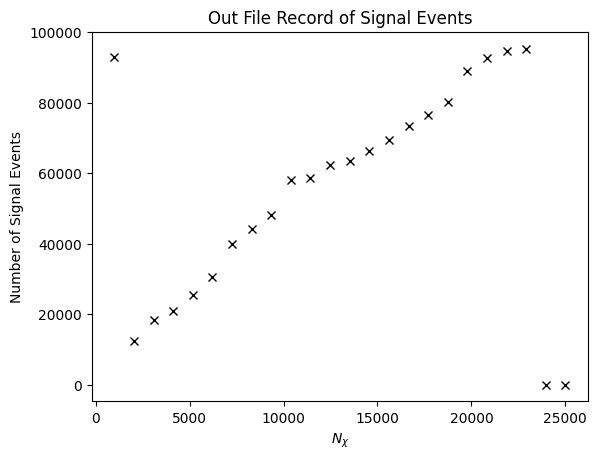

In [16]:
# plot the number of events in each file for the .out files
df = []
path_out = "../data/condor_out/out_signal_tests/"
for f in os.listdir(path_out):
    with open(path_out+f) as file:
        lines = file.readlines()
        n_chis = f.split(".")[-2][3:]
        #print(n_chis)
        for line in lines:
            if "Predicted number of signal events =" in line:
                df.append([int(n_chis), float(line.split("= ")[-1][:-2])])


df = pandas.DataFrame(df, columns=["n_chis", "n_events"])
display(df.head())


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df["n_chis"], df["n_events"], "kx")
ax.set(title="Out File Record of Signal Events", xlabel=r"$N_\chi$", ylabel="Number of Signal Events")
plt.show()


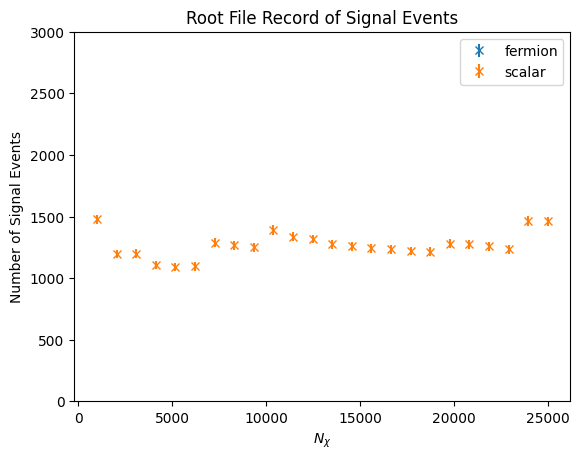

In [50]:
# In the root files
path_root = "../data/root/BdNMC/signal_tests/"

df = []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title="Root File Record of Signal Events", xlabel=r"$N_\chi$", ylabel="Number of Signal Events")
for dm_type in ["fermion", "scalar"]:
    for file in os.listdir(path_root+dm_type):
        if "root" in file:
            n_chis = int(file.split("_")[-1].split(".")[0])
            with up3.open(path_root+dm_type+"/"+file) as f:
                n_evts = f[b'elecron_tree;1'][b'electron_energy'].numentries
                #print(n_chis, n_evts)
                pot = f["pot_tree"]["tot_pot"].array()[0]
                pmax = f["pot_tree"]["pmax"].array()[0]
                pot_run1_numi = 1e21

                n_electrons = n_evts * (pot_run1_numi / pot) * pmax

                # assume posoin counting error roughly
                n_electrons_err = np.sqrt(n_electrons)
                df.append([dm_type, n_chis, n_electrons, n_electrons_err])
        
    df = pandas.DataFrame(df, columns=["dm_type", "n_chis", "n_events", "n_events_err"])
    ax.errorbar(df["n_chis"], df["n_events"], yerr=df["n_events_err"], fmt="x", label=dm_type)
    df = []

ax.set_ylim(0, 3e3)
ax.legend()
plt.show()